#### Goal: for an arbitrary (m, b, c, f), generate a fake-true dataset a la Berger et al 2020. Run it through the whole machinery and see if I recover that.

In [156]:
import numpy as np
import pandas as pd
from math import lgamma
from ast import literal_eval, parse
import matplotlib as mpl
import matplotlib.pyplot as plt

k = pd.Series([833, 134, 38, 15, 5, 0]) # actual "ground truth" Kepler transit multiplicity...this will be replaced

In [151]:
# fake model tuple
m = -0.2
b = 0.4
c = 0.4e10 
f = 0.25

# see hipergator/simulate_unit_test.py for the calculation of the new "ground truth", k
#k = pd.Series([735, 178, 129, 108, 64, 22]) # f=0.25
#k = pd.Series([607, 155, 109, 71, 27, 0]) # f=0.2
#k = pd.Series([747, 237, 121, 78, 25, 0]) # f=0.2
#k = pd.Series([737, 223, 116, 79, 55, 17]) # f=0.2
#k = pd.Series([741, 242, 106, 85, 55, 20]) # f=0.2
#k = pd.Series([809, 98, 27, 19, 8, 0]) # van_eylen
#k = pd.Series([831.6, 77.2, 0.0, 0.0, 0.0, 0.0]) # m=-1.2 van_eylen

Carry on like with logL-cube.ipynb, except I use this k as my ground truth 

In [7]:
#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass
    
def float_w_exceptions(x):
    try:
        return float(x)   
    except Exception as e:
        #print(e)
        pass

In [8]:
# change path here to get logLs_incremental_corrected.txt
df = pd.read_csv('hipergator/logLs_incremental_corrected.txt', sep='\t', error_bad_lines=False, skiprows=1, index_col=False,
                 names=['filename','m','b','c','f','logL','transit_multiplicity','intact_frac',
                            'disrupted_frac','intact_logL','intact_transit_multiplicity','disrupted_logL',
                        'disrupted_transit_multiplicity','young10_logL','young10_transit_multiplicity',
                        'old10_logL','old10_transit_multiplicity','young15_logL','young15_transit_multiplicity',
                        'old15_logL','old15_transit_multiplicity','young20_logL','young20_transit_multiplicity',
                        'old20_logL','old20_transit_multiplicity','young25_logL','young25_transit_multiplicity',
                        'old25_logL','old25_transit_multiplicity','young30_logL','young30_transit_multiplicity',
                        'old30_logL','old30_transit_multiplicity','young35_logL','young35_transit_multiplicity',
                        'old35_logL','old35_transit_multiplicity','young40_logL','young40_transit_multiplicity',
                        'old40_logL','old40_transit_multiplicity','young45_logL','young45_transit_multiplicity',
                        'old45_logL','old45_transit_multiplicity','young50_logL','young50_transit_multiplicity',
                        'old50_logL','old50_transit_multiplicity'], dtype=str)
print(df.head())
#print(df.columns)
print(df.transit_multiplicity[0])
#print(df.logL)

df.transit_multiplicity = df.transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
#df.transit_multiplicity = df.transit_multiplicity.apply(lambda y: np.nan if len(y)==0 else y)
#df.logL = df.logL.apply(str) # convert back from string to list of floats
df.logL = df.logL.apply(float_w_exceptions) # convert back from string to list of floats
df.m = df.m.apply(float_w_exceptions) # convert back from string to list of floats
df.b = df.b.apply(float_w_exceptions) # convert back from string to list of floats
df.c = df.c.apply(float_w_exceptions) # convert back from string to list of floats
df.f = df.f.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac = df.intact_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac = df.disrupted_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_logL = df.intact_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_transit_multiplicity = df.intact_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.disrupted_logL = df.disrupted_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_transit_multiplicity = df.disrupted_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young10_logL = df.young10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young10_transit_multiplicity = df.young10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old10_logL = df.old10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old10_transit_multiplicity = df.old10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young15_logL = df.young15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young15_transit_multiplicity = df.young15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old15_logL = df.old15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old15_transit_multiplicity = df.old15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young20_logL = df.young20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young20_transit_multiplicity = df.young20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old20_logL = df.old20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old20_transit_multiplicity = df.old20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young25_logL = df.young25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young25_transit_multiplicity = df.young25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old25_logL = df.old25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old25_transit_multiplicity = df.old25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young30_logL = df.young30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young30_transit_multiplicity = df.young30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old30_logL = df.old30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old30_transit_multiplicity = df.old30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young35_logL = df.young35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young35_transit_multiplicity = df.young35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old35_logL = df.old35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old35_transit_multiplicity = df.old35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young40_logL = df.young40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young40_transit_multiplicity = df.young40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old40_logL = df.old40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old40_transit_multiplicity = df.old40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young45_logL = df.young45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young45_transit_multiplicity = df.young45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old45_logL = df.old45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old45_transit_multiplicity = df.old45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young50_logL = df.young50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young50_transit_multiplicity = df.young50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old50_logL = df.old50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old50_transit_multiplicity = df.old50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats



                                            filename     m    b            c  \
0  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
1  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
2  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
3  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
4  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   

     f                logL transit_multiplicity intact_frac disrupted_frac  \
0  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
1  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
2  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
3  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
4  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   

          intact_logL  ...          old40_logL old

In [157]:
def pad(lam):
    lam += [0.] * (6 - len(lam)) # pad with zeros to match length of k
    return lam

def normalize(curr_row: pd.Series):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row['transit_multiplicity']
    first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    second = curr_row['f']
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        first = [np.array(fl)/second for fl in first]
    
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        return [np.array(fl)*sum(k)/sum(first) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan

def normalized_loglike(lam):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)
    - normalized_k: Kepler transit multiplicity divided by sum(k) (list of floats)

    Returns: Poisson log likelihood (float)
    """
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except:
        #print(lam)
        return np.nan
    
    return np.sum(logL)    

def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """
    
    logL = []
    #print(lam)
    for i in range(len(lam)):
        try:
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
        except Exception as e:
            #print("error here: ", lam)
            #print("error: ", e)
            return lam

    return np.sum(logL)

# not used for this exercise
df['normalized_transit_multiplicity'] = df.apply(func=normalize, axis=1)
#df['normalized_logL'] = better_loglike(df['normalized_transit_multiplicity'], normalized_k)
df['normalized_logL'] = df['normalized_transit_multiplicity'].apply(func=normalized_loglike)

# re-evaluate logL based on new k
df['padded_transit_multiplicities'] = df.transit_multiplicity.apply(pad)
df['sanity_check_logL'] = df['padded_transit_multiplicities'].apply(func=normalized_loglike)

In [158]:
df.padded_transit_multiplicities

0                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4                           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                               ...                        
78315    [2277.9, 1598.4, 1112.4, 762.3000000000001, 36...
78316    [2264.4, 1539.0, 1152.9, 797.4, 366.3, 66.6000...
78317         [2612.0, 1717.0, 1259.0, 816.0, 430.0, 86.0]
78318         [2531.0, 1776.0, 1236.0, 847.0, 409.0, 91.0]
78319         [2516.0, 1710.0, 1281.0, 886.0, 407.0, 74.0]
Name: padded_transit_multiplicities, Length: 78320, dtype: object

In [159]:
df.sanity_check_logL

0       -5434.568555
1       -5434.568555
2       -5434.568555
3       -5434.568555
4       -5434.568555
            ...     
78315   -3811.522896
78316   -3805.139345
78317   -4400.422949
78318   -4392.528368
78319   -4384.544816
Name: sanity_check_logL, Length: 78320, dtype: float64

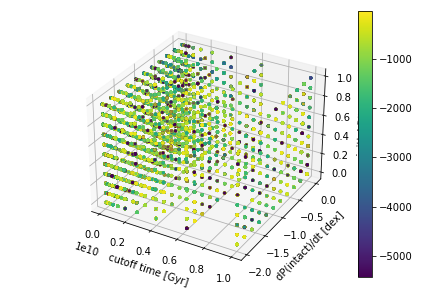

In [160]:
%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')
im = ax.scatter3D(df.c, df.m, df.b, c=df.sanity_check_logL, s=5)
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.show()

Let's check for reals what the logLs are for the "true" models. 

In [141]:
df.loc[(np.round(df.m, 1) == -0.2) & (np.round(df.f, 1) == 0.2) & (np.round(df.b, 1) == 0.4) & (df.c < 4e9)&(df.c>3e9)]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_logL,...,old45_logL,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,padded_transit_multiplicities,sanity_check_logL
63292,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-23.421723,"[786.4000000000001, 108.4, 28.8, 18.0, 8.0, 2.6]",0.057057,0.142943,-1606.328383,...,-222.796205,"[431.8, 52.800000000000004, 13.200000000000001...",-238.855110,"[399.40000000000003, 60.0, 17.2, 10.8, 5.4, 2.0]",-281.220844,"[387.0, 48.400000000000006, 11.600000000000001...","[793.6677168662047, 109.40180634320521, 29.066...",-17.895308,"[786.4000000000001, 108.4, 28.8, 18.0, 8.0, 2.6]",-17.935847
63293,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-30.375269,"[783.8000000000001, 98.60000000000001, 23.0, 1...",0.056814,0.143186,-1675.610842,...,-235.336060,"[431.40000000000003, 47.6, 12.600000000000001,...",-258.901681,"[394.8, 55.0, 12.0, 10.200000000000001, 5.4, 1.6]",-291.318334,"[389.0, 43.6, 11.0, 5.800000000000001, 4.80000...","[805.9402953135032, 101.38519152578644, 23.649...",-18.297864,"[783.8000000000001, 98.60000000000001, 23.0, 1...",-18.667268
63294,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-23.309876,"[799.6, 104.80000000000001, 26.8, 16.0, 7.2, 2.0]",0.056767,0.143233,-1645.662901,...,-209.976667,"[444.6, 56.6, 11.600000000000001, 7.0, 3.0, 0.2]",-249.442111,"[400.8, 53.0, 15.600000000000001, 9.6000000000...",-263.804312,"[398.8, 51.800000000000004, 11.200000000000001...","[803.4458385612714, 105.30405687996654, 26.928...",-16.992090,"[799.6, 104.80000000000001, 26.8, 16.0, 7.2, 2.0]",-17.003135
63295,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-22.192339,"[800.2, 108.80000000000001, 27.200000000000003...",0.056793,0.143207,-1582.208727,...,-218.982623,"[428.20000000000005, 56.800000000000004, 13.60...",-230.855959,"[410.6, 58.2, 15.8, 9.8, 6.0, 1.2000000000000002]",-273.698346,"[389.6, 50.6, 11.4, 7.4, 3.2]","[797.8752853289064, 108.48391782527496, 27.120...",-16.386317,"[800.2, 108.80000000000001, 27.200000000000003...",-16.390389
63296,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-22.336267,"[786.8000000000001, 107.4, 26.400000000000002,...",0.056361,0.143639,-1627.851553,...,-229.627664,"[431.6, 55.2, 9.200000000000001, 7.4, 3.0, 0.2]",-239.367382,"[397.8, 58.2, 18.6, 11.8, 4.800000000000001, 0.4]",-289.654717,"[389.0, 49.2, 7.800000000000001, 6.2, 2.6, 0.2]","[798.7690682442426, 109.03380519754913, 26.801...",-15.696733,"[786.8000000000001, 107.4, 26.400000000000002,...",-15.805711
63297,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-24.045197,"[788.8000000000001, 105.4, 25.0, 17.8, 7.60000...",0.056305,0.143695,-1658.609362,...,-225.989489,"[433.20000000000005, 53.0, 11.0, 7.80000000000...",-248.391378,"[396.0, 57.400000000000006, 14.8, 10.4, 4.6000...",-277.902244,"[392.8, 48.0, 10.200000000000001, 7.4, 3.0, 0.2]","[801.4768449989427, 107.09388877141045, 25.401...",-16.142685,"[788.8000000000001, 105.4, 25.0, 17.8, 7.60000...",-16.264176
63298,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-25.583721,"[798.6, 102.80000000000001, 25.8, 18.6, 7.4, 2...",0.056302,0.143698,-1697.527098,...,-214.447241,"[441.40000000000003, 54.0, 13.0, 7.60000000000...",-251.017117,"[397.6, 55.0, 14.200000000000001, 11.8, 5.0, 1.6]",-267.947873,"[401.0, 47.800000000000004, 11.600000000000001...","[802.7767782426778, 103.33765690376569, 25.934...",-17.437440,"[798.6, 102.80000000000001, 25.8, 18.6, 7.4, 2...",-17.450493
63299,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-24.409236,"[803.4000000000001, 107.2, 24.0, 17.2, 9.20000...",0.056774,0.143226,-1593.392294,...,-222.871628,"[441.0, 54.800000000000004, 9.600000000000001,...

In [114]:
df.loc[(np.round(df.m, 1) == -0.2) & (np.round(df.f, 1) == 0.2) & (np.round(df.b, 1) == 0.4) & (df.c < 4e9)&(df.c>3e9)].padded_transit_multiplicities[63300]


[786.4000000000001, 113.2, 23.400000000000002, 19.0, 7.4, 2.0]

In [142]:
df.loc[(np.round(df.m, 1) == -0.2) & (np.round(df.f, 1) == 0.3) & (np.round(df.b, 1) == 0.4) & (df.c < 4e9)&(df.c>3e9)]#.padded_transit_multiplicities[63302]



,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_logL,...,old45_logL,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,padded_transit_multiplicities,sanity_check_logL
63302,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.3,-83.919987,"[1179.6000000000001, 162.60000000000002, 43.2,...",0.085585,0.214415,-1265.026647,...,-62.094469,"[647.7, 79.20000000000002, 19.800000000000004,...",-70.653374,"[599.1000000000001, 90.00000000000001, 25.8000...",-94.319108,"[580.5000000000001, 72.60000000000001, 17.4000...","[793.6677168662046, 109.40180634320521, 29.066...",-17.895308,"[1179.6000000000001, 162.60000000000002, 43.2,...",-104.383878
63303,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.3,-82.073533,"[1175.7000000000003, 147.90000000000003, 34.50...",0.085220,0.214780,-1325.709106,...,-71.934324,"[647.1000000000001, 71.4, 18.900000000000002, ...",-82.799945,"[592.2, 82.50000000000001, 18.000000000000004,...",-103.516599,"[583.5000000000001, 65.4, 16.500000000000004, ...","[805.940295313503, 101.38519152578642, 23.6496...",-18.297864,"[1175.7000000000003, 147.90000000000003, 34.50...",-96.315299
63304,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.3,-85.908141,"[1199.4, 157.20000000000002, 40.2, 24.00000000...",0.085151,0.214849,-1298.861166,...,-55.874931,"[666.9000000000001, 84.9, 17.400000000000002, ...",-76.540376,"[601.2, 79.50000000000001, 23.400000000000002,...",-83.702576,"[598.2, 77.70000000000002, 16.800000000000004,...","[803.4458385612713, 105.30405687996654, 26.928...",-16.992090,"[1199.4, 157.20000000000002, 40.2, 24.00000000...",-105.551166
63305,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.3,-88.490604,"[1200.3000000000002, 163.20000000000002, 40.80...",0.085190,0.214810,-1240.506992,...,-58.580887,"[642.3000000000001, 85.20000000000002, 20.4000...",-66.054223,"[615.9000000000001, 87.30000000000001, 23.7000...",-89.196610,"[584.4000000000001, 75.9, 17.1, 11.10000000000...","[797.8752853289064, 108.48391782527496, 27.120...",-16.386317,"[1200.3000000000002, 163.20000000000002, 40.80...",-108.638420
63306,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.3,-80.034532,"[1180.2000000000003, 161.10000000000002, 39.60...",0.084541,0.215459,-1282.049817,...,-67.325928,"[647.4000000000001, 82.80000000000001, 13.8000...",-69.565646,"[596.7, 87.30000000000001, 27.900000000000006,...",-101.552981,"[583.5000000000001, 73.80000000000001, 11.7000...","[798.7690682442427, 109.03380519754913, 26.801...",-15.696733,"[1180.2000000000003, 161.10000000000002, 39.60...",-99.453742
63307,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.3,-81.343461,"[1183.2000000000003, 158.10000000000002, 37.50...",0.084457,0.215543,-1312.107626,...,-64.787753,"[649.8000000000001, 79.50000000000001, 16.5000...",-74.889643,"[594.0000000000001, 86.10000000000001, 22.2000...",-93.100508,"[589.2, 72.00000000000001, 15.300000000000002,...","[801.4768449989427, 107.09388877141045, 25.401...",-16.142685,"[1183.2000000000003, 158.10000000000002, 37.50...",-99.512207
63308,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.3,-87.981985,"[1197.9, 154.20000000000002, 38.7, 27.90000000...",0.084452,0.215548,-1348.825362,...,-58.845506,"[662.1000000000001, 81.00000000000001, 19.5000...",-78.015381,"[596.4000000000001, 82.50000000000001, 21.3000...",-87.746138,"[601.5000000000001, 71.70000000000002, 17.4000...","[802.7767782426778, 103.33765690376569, 25.934...",-17.437440,"[1197.9, 154.20000000000002, 38.7, 27.90000000...",-105.798524
63309,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.3,-90.107500,"[1205.1000000000001, 160.8, 36.00000000000001,...",0.085160,0.214840,-1247.790558,...,-65.369893,"[661.5000000000001, 82.2000000000000

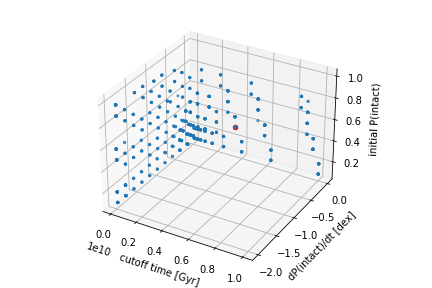

In [155]:
%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')
df_keep = df.loc[df.sanity_check_logL > -50]
im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, s=5)
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.draw()

im = ax.scatter3D(0.4e10, -0.2, 0.4, s=20, c='red')
plt.draw()

In [145]:
df.loc[df.sanity_check_logL > -50]#.padded_transit_multiplicities[4851]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_logL,...,old45_logL,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,padded_transit_multiplicities,sanity_check_logL
1230,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-23.583324,"[795.8000000000001, 108.80000000000001, 25.400...",0.058114,0.141886,-1628.202337,...,-214.942349,"[432.8, 58.400000000000006, 12.8, 7.8000000000...",-241.264843,"[407.8, 56.2, 13.8, 8.8, 3.0, 1.8]",-272.622732,"[388.0, 52.6, 11.600000000000001, 7.2, 3.80000...","[800.4645174795897, 109.43772241992883, 25.548...",-18.075642,"[795.8000000000001, 108.80000000000001, 25.400...",-18.092022
1231,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-29.143523,"[801.4000000000001, 94.2, 24.6, 18.0, 7.600000...",0.058030,0.141970,-1683.138104,...,-221.642513,"[442.0, 48.400000000000006, 12.200000000000001...",-252.714025,"[404.20000000000005, 51.400000000000006, 13.60...",-279.793038,"[397.20000000000005, 42.800000000000004, 11.0,...","[811.8758169934641, 95.43137254901961, 24.9215...",-17.395700,"[801.4000000000001, 94.2, 24.6, 18.0, 7.600000...",-17.476395
1232,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-24.514963,"[795.4000000000001, 101.0, 29.0, 13.6000000000...",0.058558,0.141442,-1621.555602,...,-210.259552,"[436.20000000000005, 54.2, 18.0, 7.4, 4.2, 0.8]",-251.419019,"[404.0, 52.2, 13.8, 7.4, 4.6000000000000005, 1...",-269.575086,"[391.40000000000003, 48.800000000000004, 15.20...","[804.9488205560236, 102.2125105307498, 29.3481...",-17.739529,"[795.4000000000001, 101.0, 29.0, 13.6000000000...",-17.807686
1233,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-26.798516,"[788.8000000000001, 99.4, 25.200000000000003, ...",0.057408,0.142592,-1639.627436,...,-223.081724,"[426.20000000000005, 53.800000000000004, 15.0,...",-251.489349,"[406.8, 51.2, 11.8, 10.4, 5.2, 1.0]",-282.708023,"[382.0, 48.2, 13.4, 8.0, 3.2, 0.8]","[804.7099787685775, 101.40488322717621, 25.708...",-16.371969,"[788.8000000000001, 99.4, 25.200000000000003, ...",-16.562307
1234,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.2,-25.852498,"[755.8000000000001, 106.0, 26.8, 15.6000000000...",0.057670,0.142330,-1745.530109,...,-237.198327,"[413.6, 52.6, 14.8, 8.8, 4.4, 0.6000000000000001]",-270.176678,"[380.20000000000005, 57.6, 13.200000000000001,...",-289.255288,"[375.6, 48.400000000000006, 13.600000000000001...","[794.1436693636563, 111.37765143232014, 28.159...",-16.684237,"[755.8000000000001, 106.0, 26.8, 15.6000000000...",-17.841818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74407,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-39.495228,"[759.0, 125.60000000000001, 57.400000000000006...",0.095696,0.104304,-1109.213090,...,-206.958981,"[413.6, 66.8, 34.4, 18.400000000000002, 9.6000...",-242.669755,"[387.0, 64.0, 26.200000000000003, 20.400000000...",-258.745505,"[372.0, 61.6, 31.200000000000003, 16.400000000...","[729.8369021412848, 120.7740644386632, 55.1945...",-40.039317,"[759.0, 125.60000000000001, 57.400000000000006...",-40.786674
74408,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-37.215829,"[767.6, 122.2, 49.2, 37.2, 16.0, 4.4]",0.096286,0.103714,-1062.676177,...,-212.859684,"[415.20000000000005, 63.0, 26.0, 19.0, 8.0, 2.6]",-231.497393,"[395.20000000000005, 65.4, 25.400000000000002,...",-268.897912,"[372.40000000000003, 56.800000000000004, 23.8,...","[740.180212723259, 117.83483845073249, 47.4425...",-35.727104,"[767.6, 122.2, 49.2, 37.2, 16.0, 4.4]",-36.370655
74409,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.000000e+10,0.2,-37.717220,"[747.8000000000001, 133.4, 57.0, 38.0, 12.6000...",0.096035,0.103965,-1072.245136,...,-220.342836,"[400.6, 67.

In [133]:
df.loc[(np.round(df.m, 1) == -0.2) & (np.round(df.f, 1) == 0.2) & (np.round(df.b, 1) == 0.4) & (df.c < 4e9)&(df.c>3e9)]

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_logL,...,old45_logL,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,padded_transit_multiplicities,sanity_check_logL
63292,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-23.421723,"[786.4000000000001, 108.4, 28.8, 18.0, 8.0, 2.6]",0.057057,0.142943,-1606.328383,...,-222.796205,"[431.8, 52.800000000000004, 13.200000000000001...",-238.855110,"[399.40000000000003, 60.0, 17.2, 10.8, 5.4, 2.0]",-281.220844,"[387.0, 48.400000000000006, 11.600000000000001...","[997.6593152699015, 137.52068893089688, 36.536...",-192.927180,"[786.4000000000001, 108.4, 28.8, 18.0, 8.0, 2.6]",-224.566289
63293,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-30.375269,"[783.8000000000001, 98.60000000000001, 23.0, 1...",0.056814,0.143186,-1675.610842,...,-235.336060,"[431.40000000000003, 47.6, 12.600000000000001,...",-258.901681,"[394.8, 55.0, 12.0, 10.200000000000001, 5.4, 1.6]",-291.318334,"[389.0, 43.6, 11.0, 5.800000000000001, 4.80000...","[1013.0862401027177, 127.44361224053071, 29.72...",-225.645408,"[783.8000000000001, 98.60000000000001, 23.0, 1...",-262.221528
63294,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-23.309876,"[799.6, 104.80000000000001, 26.8, 16.0, 7.2, 2.0]",0.056767,0.143233,-1645.662901,...,-209.976667,"[444.6, 56.6, 11.600000000000001, 7.0, 3.0, 0.2]",-249.442111,"[400.8, 53.0, 15.600000000000001, 9.6000000000...",-263.804312,"[398.8, 51.800000000000004, 11.200000000000001...","[1009.9506482643245, 132.36971978251776, 33.85...",-214.343565,"[799.6, 104.80000000000001, 26.8, 16.0, 7.2, 2.0]",-244.866098
63295,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-22.192339,"[800.2, 108.80000000000001, 27.200000000000003...",0.056793,0.143207,-1582.208727,...,-218.982623,"[428.20000000000005, 56.800000000000004, 13.60...",-230.855959,"[410.6, 58.2, 15.8, 9.8, 6.0, 1.2000000000000002]",-273.698346,"[389.6, 50.6, 11.4, 7.4, 3.2]","[1002.948329528948, 136.366881095663, 34.09172...",-200.654847,"[800.2, 108.80000000000001, 27.200000000000003...",-229.266637
63296,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-22.336267,"[786.8000000000001, 107.4, 26.400000000000002,...",0.056361,0.143639,-1627.851553,...,-229.627664,"[431.6, 55.2, 9.200000000000001, 7.4, 3.0, 0.2]",-239.367382,"[397.8, 58.2, 18.6, 11.8, 4.800000000000001, 0.4]",-289.654717,"[389.0, 49.2, 7.800000000000001, 6.2, 2.6, 0.2]","[1004.0718360447919, 137.05810268328756, 33.69...",-200.095864,"[786.8000000000001, 107.4, 26.400000000000002,...",-233.260335
63297,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-24.045197,"[788.8000000000001, 105.4, 25.0, 17.8, 7.60000...",0.056305,0.143695,-1658.609362,...,-225.989489,"[433.20000000000005, 53.0, 11.0, 7.80000000000...",-248.391378,"[396.0, 57.400000000000006, 14.8, 10.4, 4.6000...",-277.902244,"[392.8, 48.0, 10.200000000000001, 7.4, 3.0, 0.2]","[1007.4755762317615, 134.61958130683018, 31.93...",-208.430994,"[788.8000000000001, 105.4, 25.0, 17.8, 7.60000...",-241.816814
63298,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-25.583721,"[798.6, 102.80000000000001, 25.8, 18.6, 7.4, 2...",0.056302,0.143698,-1697.527098,...,-214.447241,"[441.40000000000003, 54.0, 13.0, 7.60000000000...",-251.017117,"[397.6, 55.0, 14.200000000000001, 11.8, 5.0, 1.6]",-267.947873,"[401.0, 47.800000000000004, 11.600000000000001...","[1009.1096234309623, 129.8979079497908, 32.600...",-211.511306,"[798.6, 102.80000000000001, 25.8, 18.6, 7.4, 2...",-242.139172
63299,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-24.409236,"[803.4000000000001, 107.2, 24.0, 17.2, 9.20000...",0.056774,0.143226,-1593.392294,...,-222.871628,"[441.0, 54.800000000000004, 9.60000

In [130]:
f = 0.2

In [135]:
import warnings
warnings.filterwarnings("ignore")

test = pd.read_csv('hipergator/transits9_4_8_0.csv')
transiters_berger_kepler = test.loc[test['transit_status']==1]
transit_multiplicity = list(f * transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid)
print(transit_multiplicity)

test = pd.read_csv('hipergator/transits9_4_8_1.csv')
transiters_berger_kepler = test.loc[test['transit_status']==1]
transit_multiplicity = list(f * transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid)
print(transit_multiplicity)

test = pd.read_csv('hipergator/transits9_4_8_2.csv')
transiters_berger_kepler = test.loc[test['transit_status']==1]
transit_multiplicity = list(f * transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid)
print(transit_multiplicity)

test = pd.read_csv('hipergator/transits9_4_8_3.csv')
transiters_berger_kepler = test.loc[test['transit_status']==1]
transit_multiplicity = list(f * transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid)
print(transit_multiplicity)

test = pd.read_csv('hipergator/transits9_4_8_4.csv')
transiters_berger_kepler = test.loc[test['transit_status']==1]
transit_multiplicity = list(f * transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid)
print(transit_multiplicity)

test = pd.read_csv('hipergator/transits9_4_8_5.csv')
transiters_berger_kepler = test.loc[test['transit_status']==1]
transit_multiplicity = list(f * transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid)
print(transit_multiplicity)

[788.8000000000001, 105.4, 25.0, 17.8, 7.6000000000000005, 1.2000000000000002]
[799.6, 104.80000000000001, 26.8, 16.0, 7.2, 2.0]
[786.8000000000001, 107.4, 26.400000000000002, 18.0, 7.4, 0.6000000000000001]
[798.6, 102.80000000000001, 25.8, 18.6, 7.4, 2.8000000000000003]
[791.0, 107.0, 28.400000000000002, 21.6, 7.0, 2.0]
[800.2, 108.80000000000001, 27.200000000000003, 17.2, 9.200000000000001, 1.2000000000000002]


In [ ]:
np.sum(transit_multiplicity)

1195.5

In [83]:
len(transiters_berger_kepler.kepid.unique())

5077

In [84]:
list(transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid)


[3884, 659, 274, 162, 80, 18]

In [132]:
test = pd.read_csv('hipergator/transits9_4_8_1.csv')
transiters_berger_kepler = test.loc[test['transit_status']==1]
transit_multiplicity = list(f * transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid)
transit_multiplicity

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[799.6, 104.80000000000001, 26.8, 16.0, 7.2, 2.0]

In [90]:
test = pd.read_csv('hipergator/transits0_1_3_6.csv')
transiters_berger_kepler = test.loc[test['transit_status']==1]
transit_multiplicity = list(f * transiters_berger_kepler.groupby('kepid').count()['transit_status'].reset_index().groupby('transit_status').count().reset_index().kepid)
transit_multiplicity += [0.] * (len(k) - len(transit_multiplicity))

transit_multiplicity

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[1030.75, 94.25, 0.0, 0.0, 0.0, 0.0]

In [116]:
df.c.unique()

array([1.00000000e+08, 1.58489319e+08, 2.51188643e+08, 3.98107171e+08,
       6.30957344e+08, 1.00000000e+09, 1.58489319e+09, 2.51188643e+09,
       3.98107171e+09, 6.30957344e+09, 1.00000000e+10])

In [125]:
df.loc[df.filename=='/blue/sarahballard/c.lam/sculpting2/simulations2/limbach-hybrid/transits9_4_8_9.csv']

,filename,m,b,c,f,logL,transit_multiplicity,intact_frac,disrupted_frac,intact_logL,...,old45_logL,old45_transit_multiplicity,young50_logL,young50_transit_multiplicity,old50_logL,old50_transit_multiplicity,normalized_transit_multiplicity,normalized_logL,padded_transit_multiplicities,sanity_check_logL
63272,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.0,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000,-5434.568555,...,-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-5434.568555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[nan, nan, nan, nan, nan, nan]",NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-6047.544783
63282,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.1,-257.797583,"[393.20000000000005, 54.2, 14.4, 9.0, 4.0, 1.3]",0.028528,0.071472,-2242.504243,...,-678.372065,"[215.9, 26.400000000000002, 6.6000000000000005...",-701.930970,"[199.70000000000002, 30.0, 8.6, 5.4, 2.7, 1.0]",-762.996704,"[193.5, 24.200000000000003, 5.800000000000001,...","[997.6593152699015, 137.52068893089688, 36.536...",-192.92718,"[393.20000000000005, 54.2, 14.4, 9.0, 4.0, 1.3]",-585.788083
63292,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.2,-23.421723,"[786.4000000000001, 108.4, 28.8, 18.0, 8.0, 2.6]",0.057057,0.142943,-1606.328383,...,-222.796205,"[431.8, 52.800000000000004, 13.200000000000001...",-238.855110,"[399.40000000000003, 60.0, 17.2, 10.8, 5.4, 2.0]",-281.220844,"[387.0, 48.400000000000006, 11.600000000000001...","[997.6593152699015, 137.52068893089688, 36.536...",-192.92718,"[786.4000000000001, 108.4, 28.8, 18.0, 8.0, 2.6]",-224.566289
63302,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.3,-83.919987,"[1179.6000000000001, 162.60000000000002, 43.2,...",0.085585,0.214415,-1265.026647,...,-62.094469,"[647.7, 79.20000000000002, 19.800000000000004,...",-70.653374,"[599.1000000000001, 90.00000000000001, 25.8000...",-94.319108,"[580.5000000000001, 72.60000000000001, 17.4000...","[997.6593152699013, 137.52068893089688, 36.536...",-192.92718,"[1179.6000000000001, 162.60000000000002, 43.2,...",-210.864438
63312,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.4,-265.145863,"[1572.8000000000002, 216.8, 57.6, 36.0, 16.0, ...",0.114114,0.285886,-1044.452523,...,-22.120345,"[863.6, 105.60000000000001, 26.400000000000002...",-23.179250,"[798.8000000000001, 120.0, 34.4, 21.6, 10.8, 4.0]",-28.144984,"[774.0, 96.80000000000001, 23.200000000000003,...","[997.6593152699015, 137.52068893089688, 36.536...",-192.92718,"[1572.8000000000002, 216.8, 57.6, 36.0, 16.0, ...",-339.444495
63322,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.5,-512.523723,"[1966.0, 271.0, 72.0, 45.0, 20.0, 6.5]",0.142642,0.357358,-890.030383,...,-48.298205,"[1079.5, 132.0, 33.0, 22.0, 6.5, 1.5]",-41.857110,"[998.5, 150.0, 43.0, 27.0, 13.5, 5.0]",-28.122844,"[967.5, 121.0, 29.0, 18.0, 6.5, 1.5]","[997.6593152699013, 137.52068893089688, 36.536...",-192.92718,"[1966.0, 271.0, 72.0, 45.0, 20.0, 6.5]",-545.987085
63332,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.6,-801.744127,"[2359.2000000000003, 325.20000000000005, 86.4,...",0.171171,0.428829,-777.450787,...,-116.318609,"[1295.4, 158.40000000000003, 39.60000000000001...",-102.377514,"[1198.2000000000003, 180.00000000000003, 51.60...",-69.943248,"[1161.0000000000002, 145.20000000000002, 34.80...","[997.6593152699013, 137.52068893089688, 36.536...",-192.92718,"[2359.2000000000003, 325.20000000000005, 86.4,...",-801.842644
63342,/blue/sarahballard/c.lam/sculpting2/simulation...,-0.2,0.4,3.981072e+09,0.7,-1119.839680,"[2752.4, 379.40000000000003, 100.8000000000000...",0.199699,0.500301,-693.746340,...,-213.214162,"[1511.3000000000002, 184.8, 46.2, 30.800000000...",-191.773067,"[1397.9, 210.00000000000003, 60.2, 37.80000000...",-140.638801,"[1354.5000000000002, 169.4, 40.6, 25.200000000...","[997.6593152699011, 137.

### Transit multiplicities of the best models

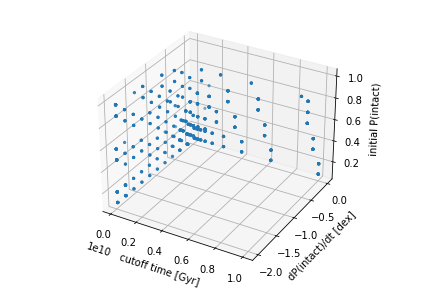

In [175]:
%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')
df_keep = df.loc[df.sanity_check_logL > -50]
im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, s=5)
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.show()

#im = ax.scatter3D(0.4e10, -0.2, 0.4, s=20, c='red')
#plt.draw()

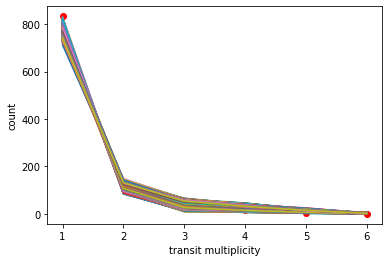

In [179]:
%matplotlib inline

plt.scatter(np.arange(6)+1, k, c='r')
for i in range(len(df_keep)):
    plt.plot(np.arange(6)+1, df_keep.reset_index().padded_transit_multiplicities.iloc[i])

plt.xlabel('transit multiplicity')
plt.ylabel('count')
plt.show()
